<div>
    <h1 align="center">Trabalho de Machine Learning</h1>
    <div align="center">Lucas de Almeida, RA: 1996762</div>
    <div align="center">Vinícius Augusto de Souza, RA: 1997530</div>
    <hr/>
    <div align="center">O <i>dataset</i> escolhido para este trabalho foi o famoso dataset <strong>Iris</strong>, que pode ser acessado <a href="https://archive.ics.uci.edu/ml/datasets/Iris">nesse link</a>.</div>
    <div align="center">Se trata de um conjunto de dados relativos a três espécies da flor Iris (Iris setosa, Iris virginica e Iris versicolor).</div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<p>Após importar as bibliotecas para auxiliar no projeto, foi necessário ler o arquivo '<i>iris.data</i>' que contém efetivamente os dados utilizados para treinar e testar o modelo.</p> 
<p>Para cada coluna dos dados, atribuiu-se seus respectivos nomes:</p>
<ul>
    <li><i>sepal_lenght</i>: o comprimento da sépala;</li>
    <li><i>sepal_width</i>: a largura da sépala;</li>
    <li><i>petal_length</i>: o comprimento da pétala;</li>
    <li><i>petal_width</i>: a largura da pétala;</li>
    <li><i>class</i>: qual é sua espécie (Iris setosa, Iris virginica ou Iris versicolor).</li> 
</ul>

In [2]:
df = pd.read_csv('iris.data')

In [3]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes

<p>Abaixo pode-se observar parte do inicio e fim do conjunto de dados já com as colunas nomeadas.

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


<p>Foi feita em seguida a plotagem dos gráficos da matriz de dispersão entre os parâmetros das amostras do
dataset, tendo na diagonal principal o histograma dos parâmetros e no restante
da matriz a dispersão dos dados. O resultado pode ser visto na figura abaixo.</p> 

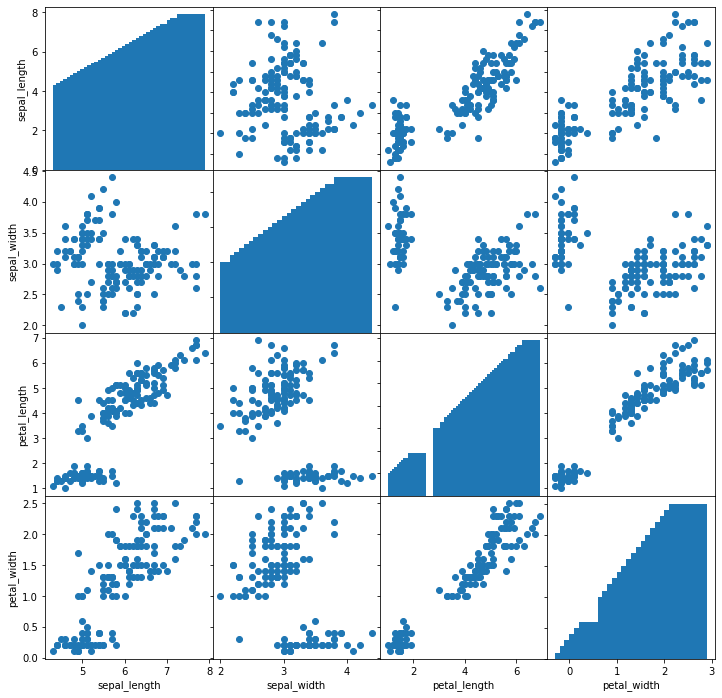

In [5]:
fig, axs = plt.subplots(4,4,figsize=(12,12))
plt.subplots_adjust(wspace=0, hspace=0)
axs[3,0].set(xlabel="sepal_length")
axs[3,1].set(xlabel="sepal_width")
axs[3,2].set(xlabel="petal_length")
axs[3,3].set(xlabel="petal_width")    
axs[0,0].set(ylabel="sepal_length")
axs[1,0].set(ylabel="sepal_width")
axs[2,0].set(ylabel="petal_length")
axs[3,0].set(ylabel="petal_width")
for j in range(0,4):
    for i in range(0,4):
        if(i == j):
            axs[i,j].bar(df.iloc[:, j],df.iloc[:,i])
        else:
            axs[i,j].scatter(df.iloc[:,j], df.iloc[:, i])
for ax in axs.flat:
    ax.label_outer()

<p>Em seguida, foi feito o boxplot desse dataset.</p> 

<h2>BoxPlot</h2>
<p> É um método para representar graficamente grupos de dados numéricos por meio de seus quartis. Os boxplot também podem ter linhas que se estendem das caixas indicando a variabilidade fora dos quartis superior e inferior </p>

<AxesSubplot:>

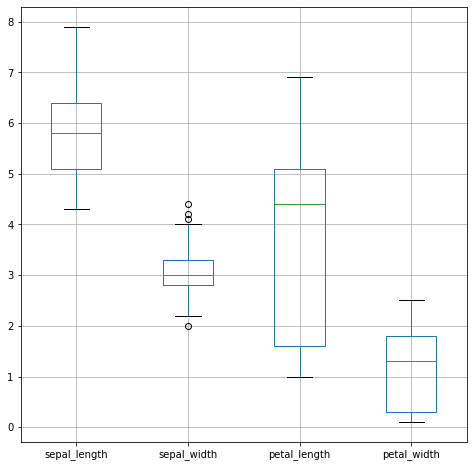

In [6]:
plt.figure(figsize = (8, 8))
df.boxplot()

<p>E então, iniciou-se o processo de treinamento do modelo de machine learning escolhido, que foi o modelo <strong>Decision Tree</strong>.</p> Os passos a seguir foram:
<ul>
    <li>Criar uma cópia da coluna "<i>class</i>" do conjunto de dados e armazenar na variável <i>y</i>;</li>
    <li>Criar uma cópia de todas as colunas do conjunto de dados, com exceção da coluna "<i>class</i>", e armazenar na variável <i>x</i>;</li>
    <li>Importar a função "<i>train_test_split</i>" da biblioteca "<i>sklearn</i>";</li>
    <li>Dividir as variáveis "<i>x</i>" e "<i>y</i>" em treino e teste usando a função "<i>train_test_split</i>", sendo 80% dos dados para treino e 20% para testes;</li>
    <li>Treinar o modelo escolhido (<i>Decision Tree</i>) com os dados de treino (<i>x_treino</i> e <i>y_treino</i>).</li>
</ul>

In [7]:
y = df['class']
x = df.drop('class', axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

<h2> Decision Tree Classifier </h2>

<p>É um método de aprendizagem supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável de destino, aprendendo regras de decisão simples inferidas dos recursos de dados. Uma árvore pode ser vista como uma aproximação constante por partes.</p>

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

<h3> Imprimindo arvore de decisão </h3>

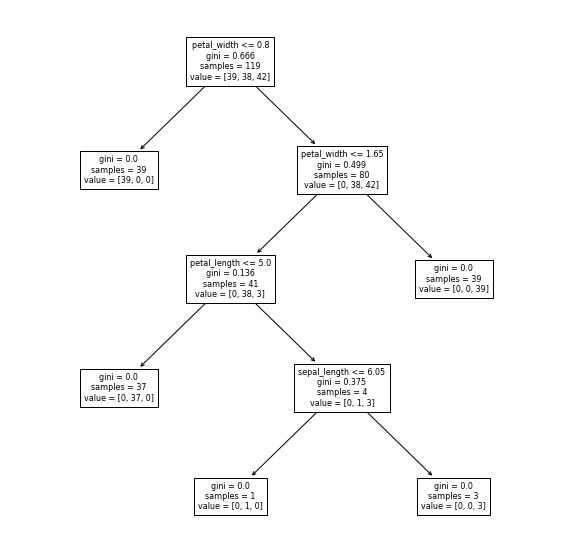

In [12]:
from sklearn import tree
clf = modelo.fit(x_treino, y_treino)
plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=8, feature_names=("sepal_length", "sepal_width", "petal_length", "petal_width"))
plt.show()

<div>Após o treino, a acurácia obtida foi a que segue abaixo:</div>

In [13]:
result = modelo.score(x_teste, y_teste)
print("Acurácia: ", result)

Acurácia:  0.9


<div>Apicando agora os testes para denotar a previsão e repassá-la para a classificação, o resultado obtido foi o que segue abaixo, na tabela, onde pode-se observar os dados de <i>precision</i>, <i>recall</i>, <i>f1-score</i> e <i>support</i>:</div>

In [14]:
previsoes = modelo.predict(x_teste)

In [15]:
previsoes

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

<h2>Classification Report</h2>

<ul>
    <li>TN / True Negative: o caso foi negativo e previsto como negativo</li>
    <li>TP / True Positive: o caso foi positivo e positivo previsto</li>
    <li>FN / False Negative: o caso era positivo, mas previsto como negativo</li>
    <li>FP / False Positive: o caso foi negativo, mas previsto como positivo</li>
</ul>


<h3>Precisão - Qual porcentagem de suas previsões estava correta?</h3>
<p>É a capacidade de um classificador de não marcar uma instância como positiva (na verdade, negativa). Para cada categoria, é definido como a proporção de verdadeiros positivos para a soma de verdadeiros positivos e falsos positivos.</p>
<p>Formula (Precisão de previsões positivas): <i>Precision = TP/(TP + FP)</i> </p>

<h3>Recall - Qual a porcentagem de casos positivos que você pegou?</h3>
<p>É a capacidade do classificador de encontrar todas as instâncias positivas. Para cada categoria, é definido como a proporção de verdadeiros positivos para a soma de verdadeiros positivos e falsos negativos.</p>
<p>Fórmula (Fração de positivos que foram identificados corretamente): <i>Recall = TP/(TP+FN)</i></p>

<h3>F1 Score - Qual porcentagem de previsões positivas estavam corretas?</h3>
<p>É a média harmônica ponderada de acurácia e recordação, portanto, a pontuação mais alta é 1,0 e a pior diferença é 0,0. As pontuações F1 são mais baixas do que as medições de precisão porque incorporam precisão e recall no cálculo. Geralmente, a média ponderada F1 deve ser usada para comparar os modelos do classificador, ao invés da precisão geral.</p>
<p>Fórmula: <i>F1 Score = 2*(Recall * Precision) / (Recall + Precision)</i></p>

<h3>Support</h3>
<p>É o número real de ocorrências da classe no conjunto de dados especificado. O suporte desequilibrado nos dados de treinamento pode indicar fraquezas estruturais nas pontuações do classificador relatadas e pode indicar a necessidade de amostragem estratificada ou rebalanceamento. O suporte não mudará entre os modelos, mas sim um processo de avaliação diagnóstica.</p>

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [17]:
classification = classification_report(y_teste, previsoes)
print('-------------------CLASSIFICATION-----------------')
print(classification)

-------------------CLASSIFICATION-----------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.78      0.88      0.82         8

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



<h3>Matriz de Confusão</h3>
<p>Por fim, foi feita a matriz de confusão de resultados, do conjunto de teste, que pode ser conferida abaixo na figura:</p>
<p>Uma matriz de confusão é uma tabela freqüentemente usada para descrever o desempenho de um modelo de classificação (ou `` classificador '') em um conjunto de dados de teste com valores verdadeiros conhecidos.</p>

In [18]:
matrix = confusion_matrix(y_teste, previsoes)

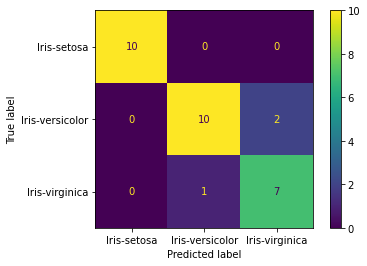

In [19]:
plot_confusion_matrix(modelo, x_teste, y_teste) 
plt.show()  